In [1]:
# импортируем библиотеку pandas для работы с датафреймами
import pandas as pd
# импортируем seaborn для визуализации
import seaborn as sns
# импортируем sklearn для кластеризации
from sklearn.cluster import KMeans 

In [2]:
df=pd.read_csv('data/values_from_the_instrument.csv')
df.head()

,x1,x2
0,48.848600,67.882051
1,60.343304,74.215686
2,48.155670,68.313920
3,48.546786,68.090451
4,47.124609,67.132278


In [3]:
X=df[['x1', 'x2']]

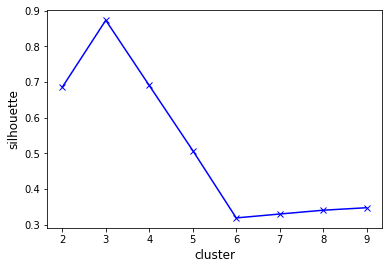

In [4]:
import matplotlib.pyplot as plt

# импортируем метрику силуэта
from sklearn.metrics import silhouette_score

# напишем функцию, как и при подсчёте метода локтя
def get_silhouette(clust_num, X):
    k_means =  KMeans(n_clusters=clust_num, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.labels_)
    return silhouette

silhouette = []
for clust_num in range(2, 10):
    silhouette.append(get_silhouette(clust_num, X))

# визуализируем коэффициенты силуэта для разного количества кластеров
plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(2, 10)], silhouette, 'xb-')

In [6]:
houses_df=pd.read_csv('data/housing.csv')
houses_df

,year,price
0,0.081091,23.790515
1,9.483270,10.784598
2,9.901805,10.003782
3,1.930438,21.879849
4,1.618601,21.851806
...,...,...
1350,12.580032,10.122039
1351,12.488949,9.934954
1352,10.693618,12.083653
1353,12.455530,10.304081


In [7]:
X=houses_df[['year', 'price']]

c:\Users\kuzin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='price'>

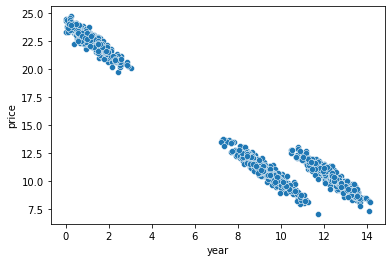

In [14]:
sns.scatterplot(houses_df.year, houses_df.price)

In [12]:
from sklearn.mixture import GaussianMixture

gm_clustering = GaussianMixture(n_components=3, random_state=42)

# обучаем модель 
gm_clustering.fit(X)

# для матрицы X получаем предсказания, к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(X)

In [16]:
import pandas as pd
from sklearn.mixture import GaussianMixture
df = pd.read_csv('data/housing.csv')
gaussian_clustering = GaussianMixture(n_components=3)
# обучаем модель кластеризации и делаем предсказание для наших данных
predictions = gaussian_clustering.fit_predict(X=df[['year', 'price']])


<AxesSubplot:xlabel='year', ylabel='price'>

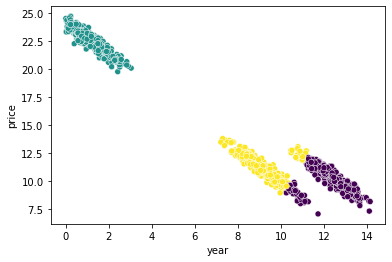

In [17]:
from sklearn.cluster import KMeans
kmeans_clustering = KMeans(n_clusters=3)
# обучим модель кластеризации и предскажем кластеры для наших данных
predictions_kmeans = kmeans_clustering.fit_predict(X=df[['year', 'price']])
# визуализируем результаты
sns.scatterplot(x=df.year, y=df.price, c=predictions_kmeans)

<AxesSubplot:xlabel='year', ylabel='price'>

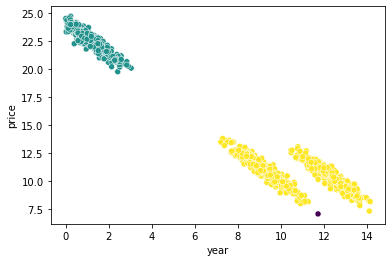

In [23]:
from sklearn.cluster import DBSCAN
dbscan_clustering = DBSCAN(eps=1.15, min_samples=2)
# обучаем модель DBSCAN и делаем предсказания
predictions_dbscan = dbscan_clustering.fit_predict(X=df[['year', 'price']])
# визуализируем результаты
sns.scatterplot(x=df.year, y=df.price, c=predictions_dbscan)